This computes the distribution of note durations across the entire dataset

In [1]:
%cd ../..

/home/napulen/AugmentedNet


In [2]:
import os

import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [3]:
summary = "dataset/dataset_summary.tsv"
dfsummary = pd.read_csv(summary, sep="\t")

In [4]:
training = dfsummary[dfsummary.split == "training"]

In [5]:
df = None
for nickname in training.file:
    tsvpath = os.path.join("dataset", "training", f"{nickname}.tsv")
    print(tsvpath)
    dffile = pd.read_csv(tsvpath, sep="\t")
    dffile = dffile[dffile.s_isOnset.apply(lambda x: sum(eval(x)) > 0)]
    if df is None:
        df = dffile
    else:
        df = pd.concat([df, dffile], ignore_index=True)

dataset/training/abc-op131-3.tsv
dataset/training/abc-op95-4.tsv
dataset/training/abc-op132-2.tsv
dataset/training/abc-op95-2.tsv
dataset/training/abc-op130-1.tsv
dataset/training/abc-op95-1.tsv
dataset/training/abc-op127-3.tsv
dataset/training/abc-op18-no6-2.tsv
dataset/training/abc-op127-4.tsv
dataset/training/abc-op130-2.tsv
dataset/training/abc-op18-no5-3.tsv
dataset/training/abc-op59-no1-2.tsv
dataset/training/abc-op59-no1-3.tsv
dataset/training/abc-op18-no4-4.tsv
dataset/training/abc-op18-no5-1.tsv
dataset/training/abc-op132-1.tsv
dataset/training/abc-op74-2.tsv
dataset/training/abc-op18-no5-2.tsv
dataset/training/abc-op127-1.tsv
dataset/training/abc-op18-no3-2.tsv
dataset/training/abc-op18-no2-4.tsv
dataset/training/abc-op131-6.tsv
dataset/training/abc-op135-4.tsv
dataset/training/abc-op135-3.tsv
dataset/training/abc-op18-no2-3.tsv
dataset/training/abc-op18-no6-4.tsv
dataset/training/abc-op59-no3-2.tsv
dataset/training/abc-op59-no3-4.tsv
dataset/training/abc-op59-no2-1.tsv
datas

In [6]:
df

,j_offset,s_duration,s_measure,s_notes,s_intervals,s_isOnset,a_measure,a_duration,a_annotationNumber,a_romanNumeral,...,a_localKey,a_tonicizedKey,a_degree1,a_degree2,measureMisalignment,qualityScoreNotes,qualityNonChordTones,qualityMissingChordTones,qualitySquaredSum,incongruentBass
0,1.00,1.00,1.0,"['B3', 'D4', 'F#4']","['m3', 'P5']","[True, True, True]",1.0,2.0,0.0,i,...,b,b,1,None,False,"['B', 'D', 'F#', 'B', 'D', 'F#', 'B', 'D', 'F#...",0.00,0.0,0.00,0.00
1,2.00,1.00,1.0,"['A#3', 'C#4', 'F#4', 'C#5']","['m3', 'm6', 'm3']","[True, True, True, True]",1.0,2.0,1.0,V,...,b,b,5,None,False,"['A#', 'C#', 'F#', 'C#', 'A#', 'C#', 'F#', 'C#...",0.00,0.0,0.00,0.00
2,4.50,0.25,2.0,['F#4'],[],[True],2.0,2.0,2.0,V,...,b,b,5,None,False,"['A#', 'C#', 'F#', 'C#', 'A#', 'C#', 'F#', 'C#...",0.21,0.0,0.05,0.88
3,4.75,0.25,2.0,['G#4'],[],[True],2.0,2.0,2.0,V,...,b,b,5,None,False,"['A#', 'C#', 'F#', 'C#', 'A#', 'C#', 'F#', 'C#...",0.21,0.0,0.05,0.88
4,5.00,0.50,2.0,['A#4'],[],[True],2.0,2.0,2.0,V,...,b,b,5,None,False,"['A#', 'C#', 'F#', 'C#', 'A#', 'C#', 'F#', 'C#...",0.21,0.0,0.05,0.88
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
267847,73.00,0.25,19.0,"['F#2', 'E3', 'C#4', 'A#4']","['m7', 'P5', 'M3']","[False, True, False, True]",19.0,1.0,65.0,V7,...,B,B,5,None,False,"['F#', 'E', 'C#', 'A#', 'F#', 'E', 'C#', 'A#',...",0.06,0.0,0.00,0.00
267848,73.25,0.25,19.0,"['F#2', 'C#3', 'C#4', 'A#4']","['P5', 'P5', 'M3']","[False, True, False, False]",19.0,1.0,65.0,V7,...,B,B,5,None,False,"['F#', 'E', 'C#', 'A#', 'F#', 'E', 'C#', 'A#',...",0.06,0.0,0.00,0.00
267849,73.50,0.25,19.0,"['F#2', 'D#3', 'C#4', 'A#4']","['M6', 'P5', 'M3']","[False, True, False, False]",19.0,1.0,65.0,V7,...,B,B,5,None,False,"['F#', 'E', 'C#', 'A#', 'F#', 'E', 'C#', 'A#',...",0.06,0.0,0.00,0.00
267850,73.75,0.25,19.0,"['F#2', 'E3', 'C#4', 'A#4']","['m7', 'P5', 'M3']","[False, True, False, False]",19.0,1.0,65.0,V7,...,B,B,5,None,False,"['F#', 'E', 'C#', 'A#', 'F#', 'E', 'C#', 'A#',...",0.06,0.0,0.00,0.00


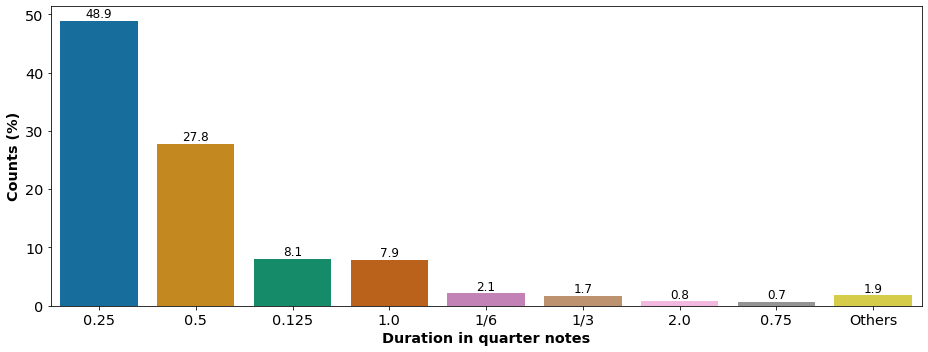

In [35]:
# durations
def fdurs(d):
    if d == 0.1667:
        return "1/6"
    elif d == 0.3333:
        return "1/3"
    else:
        return str(d)


plt.rcParams["figure.figsize"] = (13, 5)
rows = len(df.index)
durcounts = df.s_duration.value_counts().to_dict()
durcounts = {fdurs(k): (100.0 * v/rows) for k, v in durcounts.items() if v > (rows * 0.005)}
durcounts["Others"] = 100.0 - sum(durcounts.values())
dfrn = pd.DataFrame({"Duration in quarter notes": list(durcounts.keys()), "Counts": list(durcounts.values())})
g = sns.barplot(x="Duration in quarter notes", y="Counts", palette="colorblind", data=dfrn)
g.bar_label(g.containers[0], fmt="%.1f", fontsize="large")
plt.xticks(fontsize="x-large")
plt.yticks(fontsize="x-large")
plt.xlabel("Duration in quarter notes", fontsize="x-large", fontweight="bold")
plt.ylabel("Counts (%)", fontsize="x-large", fontweight="bold")
plt.tight_layout()
plt.savefig("duration_distribution.png")